In [8]:
import yaml
import numpy as np
from yaml import CLoader as Loader

In [50]:
def read_band_yaml(filename):
    with open(filename) as f:
        data = yaml.load(f,Loader=Loader)

    frequencies = []
    distances = []
    qpoints = []
    labels = []
    for j, v in enumerate(data["phonon"]):
        if "label" in v:
            labels.append(v["label"])
        else:
            labels.append(None)
        frequencies.append([f["frequency"] for f in v["band"]])
        qpoints.append(v["q-position"])
        distances.append(v["distance"])

    if "labels" in data:
        labels = data["labels"]
    elif all(x is None for x in labels):
        labels = []

    return (
        np.array(distances),
        np.array(frequencies),
        np.array(qpoints),
        data["segment_nqpoint"],
        labels,
    )

In [51]:
(distances,freqs,qpoints,segment_nqpoint,labels)=read_band_yaml("./band.yaml")

In [55]:
segment_nqpoint,labels

([51, 51, 51], [['$\\Gamma$', 'K'], ['K', 'M'], ['M', '$\\Gamma$']])

In [58]:
end_points = [0,]
lbls = [labels[0][0]]
for i,nq in enumerate(segment_nqpoint):
    end_points.append(nq + end_points[-1])
    lbls.append(labels[i][1])
end_points[-1] -= 1


In [59]:
end_points,lbls

([0, 51, 102, 152], ['$\\Gamma$', 'K', 'M', '$\\Gamma$'])

In [46]:
distances.shape, freqs[:,0].shape,labels

((153,), (153,), [['$\\Gamma$', 'K'], ['K', 'M'], ['M', '$\\Gamma$']])

([<matplotlib.axis.XTick at 0x2b0edaa16260>,
 [Text(0.0, 0, '$\\Gamma$'),
  Text(0.1878186, 0, 'K'),
  Text(0.2817279, 0, 'M'),
  Text(0.4443836, 0, '$\\Gamma$')])

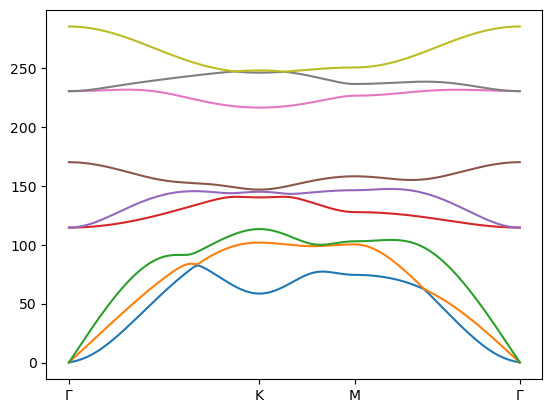

In [60]:
import matplotlib.pyplot as plt
plt.plot(distances,freqs)
plt.xticks(distances[end_points],lbls)